# **Task 2 on code**



- Read the chb06_01.edf file
- Show all metadata with channels and sampling frequency
- Convert it to dataframe
- Plot the seizure data 
- Plot the 2 slice of normal data with the same length according to one seizure duration
- Compare one of seizures plot with the 2 normal plots and observe the difference

# **Task 3 on code**

- Draw the plot of features Mean, and Std wrt 1 Event, and 2 Non-event for all the three seizures

In [1]:
import os 
import sys
import time
import math
import re 
import datetime
from datetime import datetime, timedelta
import logging
import shutil
import copy 

from pprint import pprint

import numpy as np 
import pandas as pd 
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn



In [2]:
from google.colab import drive
from google.colab import files
drive_name = '/content/gdrive'
drive.mount(drive_name, force_remount=True)

Mounted at /content/gdrive


In [3]:
### Setting up all paths 
proj_root_dir = f'{drive_name}/MyDrive/Sahid\'s Work/Test Tasks/chb06_01.edf'
#proj_root_dir = f'{drive_name}/MyDrive/Personal/Research/HSTU BioMed1 Research/Sahid\'s Work/Test Tasks/chb01_03.edf'

# **Raw Data Management Functions: Load, Save, Column Delete, Column Reorder and Preprocess** 

In [4]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.5 MB 7.4 MB/s 


In [5]:
import mne

## **Loading Raw EEG Data**

In [6]:
data = mne.io.read_raw_edf(proj_root_dir)

Extracting EDF parameters from /content/gdrive/MyDrive/Sahid's Work/Test Tasks/chb06_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-6-b26359d0076b>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_edf(proj_root_dir)


In [7]:
raw_data = data.get_data()
channels = data.ch_names

# **Showing Metadata**

In [8]:
data_info = data.__dict__
data_info

{'preload': False,
 '_last_samps': array([3693311]),
 '_first_samps': array([0]),
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
  chs: 23 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 128.0 Hz
  meas_date: 2060-01-26 19:08:32 UTC
  nchan: 23
  projs: []
  sfreq: 256.0 Hz
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]),
 '_raw_extras': [{'events': [],
   'units': array([1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06,
          1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06, 1.e-06]),
   'ch_names': ['FP1-F7',
    'F7-T7',
    'T7-P7',
    'P7-O1',
    'FP1-F3',
    'F3-C3',
    'C3-P3',
    'P3-O1',
    'FP2-F4',
    'F4-C4',
    'C4-P4',
    'P4-O2',
    'FP2-F8',
    'F8-T8',
    'T8-P8-0',
    'P8-O2',
    'F

In [9]:
data_info['info']['sfreq'] #['_raw_extras']#['sfreq']

256.0

# **Information of specific channels**

In [10]:
data.info['chs'][0] #information of first channel

{'cal': 1.0,
 'logno': 1,
 'scanno': 1,
 'range': 1.0,
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'FP1-F7',
 'unit': 107 (FIFF_UNIT_V),
 'coord_frame': 4 (FIFFV_COORD_HEAD),
 'coil_type': 1 (FIFFV_COIL_EEG),
 'kind': 2 (FIFFV_EEG_CH),
 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}

# **Showing Original Dataframe**

In [11]:
df = data.to_data_frame()
df

,time,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000000,64.273504,139.291819,144.371184,-106.862027,288.547009,13.870574,20.903541,-82.246642,172.112332,...,13.089133,37.313797,-41.611722,-183.052503,-160.390720,-143.980464,-20.512821,-88.498168,-34.578755,37.313797
1,0.003906,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
2,0.007812,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
3,0.011719,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,-0.195360,...,0.195360,0.195360,0.195360,0.586081,0.586081,0.195360,0.195360,0.586081,-0.195360,0.195360
4,0.015625,0.195360,0.195360,0.976801,-0.195360,0.586081,0.195360,0.195360,-0.195360,0.195360,...,0.586081,-0.195360,-0.195360,-0.195360,-0.195360,-0.586081,0.586081,-0.586081,1.758242,-0.195360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693307,14426.980469,38.876679,-15.824176,34.188034,-68.571429,-26.373626,-47.081807,39.267399,22.466422,-18.949939,...,64.664225,-13.870574,-3.711844,-0.586081,-44.737485,-33.797314,57.631258,-5.665446,20.512821,-13.870574
3693308,14426.984375,52.161172,-7.619048,4.102564,-52.551893,-31.452991,-47.081807,36.923077,36.532357,-38.485958,...,71.697192,-25.592186,0.976801,-20.903541,-45.128205,-3.711844,44.737485,-7.228327,25.592186,-25.592186
3693309,14426.988281,57.631258,4.493284,-25.592186,-40.048840,-39.658120,-45.518926,33.015873,47.472527,-47.863248,...,53.724054,4.102564,-8.400488,-34.969475,-45.128205,25.982906,28.327228,-8.791209,0.976801,4.102564
3693310,14426.992188,45.128205,15.824176,-44.346764,-31.062271,-48.253968,-49.035409,27.545788,54.896215,-39.658120,...,41.611722,17.387057,-7.228327,-43.174603,-43.565324,44.737485,11.135531,-13.870574,-9.181929,17.387057


# **Slicing Seizure's Data**

# **Slicing seizure-1 data from 1724s to 1738s of channel 17**

In [12]:
C17_SZ1 = df.iloc[256*1724: 256*1738, [17]]
C17_SZ1

,FZ-CZ
441344,173.675214
441345,185.787546
441346,201.416361
441347,213.137973
441348,226.031746
...,...
444923,-156.874237
444924,-140.463980
444925,-111.941392
444926,-58.803419


# Making list to C17_SZ1L 

In [13]:
C17_SZ1L = C17_SZ1.values.T[0].tolist()
C17_SZ1L

[173.67521367521368,
 185.78754578754578,
 201.4163614163614,
 213.13797313797312,
 226.031746031746,
 235.01831501831498,
 243.6141636141636,
 256.8986568986569,
 265.49450549450546,
 279.56043956043953,
 291.28205128205127,
 300.2686202686203,
 307.6923076923076,
 310.4273504273504,
 317.0695970695971,
 319.8046398046398,
 322.53968253968253,
 324.4932844932845,
 321.75824175824175,
 318.24175824175825,
 312.7716727716728,
 303.00366300366295,
 293.6263736263736,
 282.2954822954823,
 270.96459096459097,
 260.4151404151404,
 245.95848595848597,
 229.93894993894995,
 208.44932844932842,
 184.6153846153846,
 163.9072039072039,
 146.32478632478632,
 127.57020757020757,
 108.42490842490842,
 87.32600732600733,
 59.975579975579976,
 34.57875457875458,
 9.57264957264957,
 -13.08913308913309,
 -35.75091575091575,
 -58.80341880341879,
 -80.29304029304029,
 -101.39194139194139,
 -120.14652014652015,
 -137.33821733821733,
 -149.45054945054946,
 -159.21855921855922,
 -168.2051282051282,
 -172.89

# **Extracting Mean and Std feature from C17_SZ1**

In [14]:
C17_SZ1_Mean = C17_SZ1.mean()
C17_SZ1_Std = C17_SZ1.std()
print(C17_SZ1_Mean)
print(C17_SZ1_Std)

FZ-CZ    0.01995
dtype: float64
FZ-CZ    97.022196
dtype: float64


# **Slicing non-seizure data from 1704s to 1718s of channel 17**

In [15]:
C17_NS1 = df.iloc[256*1704: 256*1718, [17]]
C17_NS1

,FZ-CZ
436224,32.234432
436225,22.466422
436226,16.605617
436227,14.261294
436228,13.089133
...,...
439803,58.803419
439804,36.532357
439805,14.261294
439806,-6.056166


# **Extracting Feature Mean and Std from C17_NS1**

In [16]:
C17_NS1_Mean = C17_NS1.mean()
C17_NS1_Std = C17_NS1.std()
print(C17_NS1_Mean)
print(C17_NS1_Std)

FZ-CZ    5.222288
dtype: float64
FZ-CZ    124.781741
dtype: float64


# Making list to C17_NS1

In [17]:
C17_NS1L = C17_NS1.values.T[0].tolist()
C17_NS1L

[32.23443223443223,
 22.46642246642246,
 16.605616605616603,
 14.26129426129426,
 13.089133089133089,
 16.214896214896214,
 17.387057387057386,
 20.122100122100118,
 22.46642246642246,
 27.15506715506715,
 33.7973137973138,
 35.36019536019536,
 38.87667887667887,
 39.65811965811965,
 39.65811965811965,
 41.221001221001224,
 44.737484737484735,
 43.56532356532356,
 36.92307692307691,
 33.7973137973138,
 29.108669108669105,
 27.936507936507937,
 31.06227106227106,
 31.843711843711844,
 28.717948717948715,
 24.810744810744808,
 22.46642246642246,
 20.51282051282051,
 18.559218559218557,
 18.559218559218557,
 13.47985347985348,
 9.57264957264957,
 10.354090354090353,
 11.916971916971914,
 15.43345543345543,
 19.731379731379732,
 18.94993894993895,
 15.824175824175823,
 14.26129426129426,
 13.870573870573867,
 14.26129426129426,
 15.43345543345543,
 14.652014652014651,
 12.307692307692307,
 8.00976800976801,
 6.056166056166055,
 5.665445665445665,
 10.354090354090353,
 15.04273504273504,
 2

# Slicing Non-Seizure Data of NS2 from 1744s to 1758s of channel 17

In [18]:
C17_NS2 = df.iloc[256*1744: 256*1758, [17]]
C17_NS2

,FZ-CZ
446464,-51.770452
446465,-41.611722
446466,-35.360195
446467,-29.890110
446468,-24.810745
...,...
450043,4.493284
450044,15.042735
450045,22.857143
450046,31.062271


#Extracting Feature Mean and Std from C17_NS2

In [19]:
C17_NS2_Mean = C17_NS2.mean()
C17_NS2_Std = C17_NS2.std()
print(C17_NS2_Mean)
print(C17_NS2_Std)

FZ-CZ   -3.031572
dtype: float64
FZ-CZ    123.736401
dtype: float64


# Making list to C17_NS2

In [20]:
C17_NS2L = C17_NS2.values.T[0].tolist()
C17_NS2L

[-51.77045177045177,
 -41.611721611721606,
 -35.36019536019536,
 -29.89010989010989,
 -24.810744810744808,
 -20.122100122100118,
 -19.731379731379732,
 -15.04273504273504,
 -12.698412698412698,
 -8.400488400488399,
 -4.102564102564103,
 -1.3675213675213682,
 0.19536019536019467,
 -0.19536019536019603,
 -0.9768009768009775,
 -2.9304029304029307,
 -6.056166056166057,
 -11.135531135531137,
 -18.55921855921856,
 -25.592185592185594,
 -33.7973137973138,
 -40.43956043956044,
 -45.12820512820513,
 -47.47252747252747,
 -50.98901098901099,
 -55.67765567765568,
 -60.366300366300365,
 -66.22710622710623,
 -73.65079365079364,
 -77.94871794871796,
 -82.24664224664225,
 -85.37240537240537,
 -88.88888888888889,
 -92.7960927960928,
 -97.09401709401708,
 -102.56410256410255,
 -107.64346764346763,
 -112.33211233211233,
 -117.4114774114774,
 -123.27228327228327,
 -130.3052503052503,
 -136.55677655677653,
 -142.02686202686203,
 -145.5433455433455,
 -152.57631257631257,
 -158.04639804639805,
 -166.25152625

#Making Dataset df1

In [21]:
Data1 = {
    'S': C17_SZ1L,
    'NS1': C17_NS1L,
    'NS2': C17_NS2L
}
df1 = pd.DataFrame(Data1)
df1

,S,NS1,NS2
0,173.675214,32.234432,-51.770452
1,185.787546,22.466422,-41.611722
2,201.416361,16.605617,-35.360195
3,213.137973,14.261294,-29.890110
4,226.031746,13.089133,-24.810745
...,...,...,...
3579,-156.874237,58.803419,4.493284
3580,-140.463980,36.532357,15.042735
3581,-111.941392,14.261294,22.857143
3582,-58.803419,-6.056166,31.062271


# Plotting S, NS1, NS2 for Seizure-1 of Channel 17

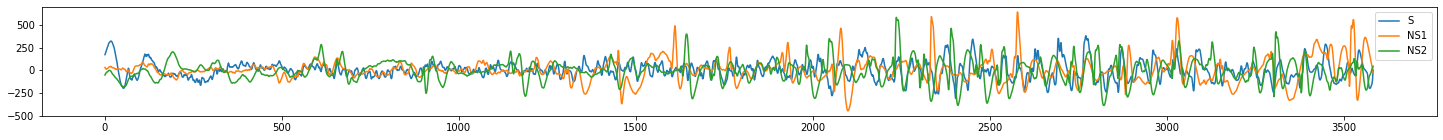

In [22]:
df1.plot(figsize=(25, 2))

# **Slicing seizure-2 data from 7461s to 7476s of channel 18**

In [23]:
C18_SZ2 = df.iloc[256*7461: 256*7476, [18]]
C18_SZ2

,CZ-PZ
1910016,75.213675
1910017,62.710623
1910018,50.207570
1910019,38.095238
1910020,23.638584
...,...
1913851,-29.890110
1913852,-29.499389
1913853,-33.015873
1913854,-38.876679


# Extracting Feature Mean and Std from C18_SZ1

In [24]:
C18_SZ2_Mean = C18_SZ2.mean()
C18_SZ2_Std = C18_SZ2.std()
print(C18_SZ2_Mean)
print(C18_SZ2_Std)

CZ-PZ   -3.582621
dtype: float64
CZ-PZ    81.749642
dtype: float64


# Making list of C18_SZ1

In [25]:
C18_SZ2L = C18_SZ2.values.T[0].tolist()
C18_SZ2L

[75.21367521367522,
 62.71062271062271,
 50.2075702075702,
 38.095238095238095,
 23.638583638583636,
 9.57264957264957,
 1.7582417582417573,
 0.19536019536019467,
 -3.3211233211233218,
 -3.3211233211233218,
 -8.00976800976801,
 -17.777777777777775,
 -24.810744810744808,
 -31.843711843711844,
 -36.53235653235653,
 -38.485958485958484,
 -42.78388278388278,
 -49.81684981684982,
 -56.06837606837607,
 -64.66422466422466,
 -71.30647130647131,
 -73.65079365079364,
 -73.65079365079364,
 -77.55799755799755,
 -80.29304029304029,
 -86.93528693528694,
 -93.96825396825398,
 -92.7960927960928,
 -86.54456654456654,
 -77.55799755799755,
 -67.78998778998778,
 -59.58485958485958,
 -58.02197802197802,
 -57.24053724053724,
 -54.89621489621489,
 -51.37973137973138,
 -45.51892551892551,
 -36.53235653235653,
 -26.373626373626376,
 -18.94993894993895,
 -13.08913308913309,
 -9.572649572649572,
 -8.00976800976801,
 -6.837606837606838,
 -5.665445665445666,
 -1.3675213675213682,
 0.5860805860805853,
 1.7582417582

# Slicing Non-seizure data from 7441s to 7456s of channel 18

In [26]:
C18_NS1 = df.iloc[256*7441: 256*7456, [18]]
C18_NS1

,CZ-PZ
1904896,13.870574
1904897,45.518926
1904898,71.306471
1904899,90.842491
1904900,103.736264
...,...
1908731,178.363858
1908732,184.615385
1908733,187.741148
1908734,193.601954


# **Extracting Features Mean and Std from C18_NS1**

In [27]:
C18_NS1_Mean = C18_NS1.mean()
C18_NS1_Std = C18_NS1.std()
print(C18_NS1_Mean)
print(C18_NS1_Std)

CZ-PZ    0.36162
dtype: float64
CZ-PZ    100.71571
dtype: float64


# Making list of C18_NS1

In [28]:
C18_NS1L = C18_NS1.values.T[0].tolist()
C18_NS1L

[13.870573870573867,
 45.51892551892551,
 71.30647130647131,
 90.84249084249085,
 103.73626373626372,
 108.42490842490842,
 106.86202686202687,
 99.04761904761905,
 86.93528693528694,
 71.30647130647131,
 58.80341880341879,
 49.42612942612943,
 40.04884004884005,
 33.015873015873005,
 29.499389499389494,
 27.936507936507937,
 25.982905982905983,
 26.373626373626372,
 23.638583638583636,
 18.559218559218557,
 11.526251526251526,
 6.446886446886445,
 -0.9768009768009775,
 -5.665445665445666,
 -4.102564102564103,
 -3.711843711843712,
 -4.493284493284494,
 -6.446886446886447,
 -13.87057387057387,
 -24.810744810744808,
 -33.7973137973138,
 -45.12820512820513,
 -59.1941391941392,
 -74.82295482295483,
 -91.23321123321124,
 -107.64346764346763,
 -124.05372405372404,
 -138.5103785103785,
 -152.57631257631257,
 -166.64224664224662,
 -175.62881562881563,
 -185.78754578754578,
 -194.77411477411476,
 -203.76068376068375,
 -212.74725274725276,
 -219.78021978021977,
 -225.25030525030522,
 -229.938949

# Slicing Data from 7481s to 7496s of channel 18

In [29]:
C18_NS2 = df.iloc[256*7481: 256*7496, [18]]
C18_NS2

,CZ-PZ
1915136,197.509158
1915137,214.310134
1915138,229.548230
1915139,239.316239
1915140,245.567766
...,...
1918971,-147.106227
1918972,-136.556777
1918973,-126.788767
1918974,-115.067155


# **Extracting Features Mean and Std of C18_NS2**

In [30]:
C18_NS2_Mean = C18_NS2.mean()
C18_NS2_Std = C18_NS2.std()
print(C18_NS2_Mean)
print(C18_NS2_Std)

CZ-PZ   -1.445971
dtype: float64
CZ-PZ    107.974681
dtype: float64


# Making list of C18_NS2

In [31]:
C18_NS2L = C18_NS2.values.T[0].tolist()
C18_NS2L

[197.5091575091575,
 214.31013431013432,
 229.54822954822953,
 239.3162393162393,
 245.56776556776558,
 251.4285714285714,
 255.33577533577534,
 256.8986568986569,
 256.8986568986569,
 255.72649572649573,
 249.08424908424905,
 242.05128205128204,
 231.89255189255186,
 220.95238095238096,
 209.23076923076923,
 200.24420024420024,
 186.95970695970695,
 171.7216117216117,
 154.52991452991452,
 136.16605616605617,
 119.36507936507937,
 106.08058608058607,
 92.7960927960928,
 78.73015873015873,
 63.49206349206349,
 46.69108669108669,
 31.45299145299145,
 17.387057387057386,
 6.056166056166055,
 -2.1489621489621498,
 -12.698412698412698,
 -21.684981684981686,
 -32.62515262515262,
 -42.78388278388278,
 -52.55189255189255,
 -63.101343101343105,
 -74.43223443223442,
 -86.93528693528694,
 -102.56410256410255,
 -117.8021978021978,
 -131.86813186813188,
 -144.76190476190476,
 -158.8278388278388,
 -172.1123321123321,
 -183.83394383394383,
 -194.77411477411476,
 -205.3235653235653,
 -213.91941391941

# Making dataset df2 from seizure 2 of channel 18

In [32]:
Data2 = {
    'S': C18_SZ2L,
    'NS1': C18_NS1L,
    'NS2': C18_NS2L
}
df2 = pd.DataFrame(Data2)
df2

,S,NS1,NS2
0,75.213675,13.870574,197.509158
1,62.710623,45.518926,214.310134
2,50.207570,71.306471,229.548230
3,38.095238,90.842491,239.316239
4,23.638584,103.736264,245.567766
...,...,...,...
3835,-29.890110,178.363858,-147.106227
3836,-29.499389,184.615385,-136.556777
3837,-33.015873,187.741148,-126.788767
3838,-38.876679,193.601954,-115.067155


# Plotting seizure 2 data of channel 18

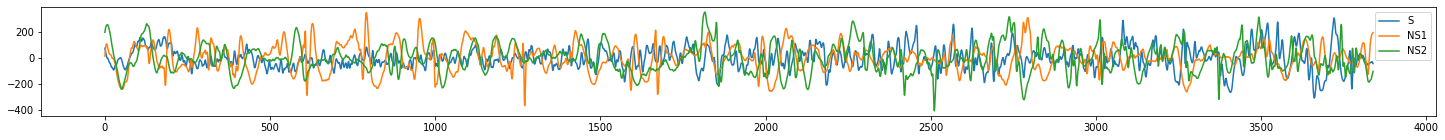

In [33]:
df2.plot(figsize=(25, 2))

# **Slicing seizure-3 data from 13525s to 13540s of channel 19**

In [34]:
C19_SZ3 = df.iloc[256*13525:256*13540, [19]]
C19_SZ3

,P7-T7
3462400,36.923077
3462401,48.644689
3462402,67.789988
3462403,92.405372
3462404,118.583639
...,...
3466235,34.969475
3466236,32.625153
3466237,-0.586081
3466238,-17.777778


# **Extracting Features Mean and Std of C19_SZ3**

In [35]:
C19_SZ3_Mean = C19_SZ3.mean()
C19_SZ3_Std = C19_SZ3.std()
print(C19_SZ3_Mean) 
print(C19_SZ3_Std) 

P7-T7    0.788258
dtype: float64
P7-T7    59.199926
dtype: float64


# Making list of C19_SZ1

In [36]:
C19_SZ3L = C19_SZ3.values.T[0].tolist()
C19_SZ3L

[36.92307692307691,
 48.64468864468864,
 67.78998778998778,
 92.4053724053724,
 118.58363858363857,
 143.5897435897436,
 153.35775335775335,
 161.17216117216117,
 170.15873015873015,
 154.13919413919413,
 144.37118437118434,
 136.94749694749694,
 126.78876678876678,
 134.21245421245422,
 147.88766788766787,
 156.48351648351647,
 163.5164835164835,
 140.07326007326006,
 107.25274725274726,
 86.54456654456654,
 70.13431013431013,
 61.53846153846153,
 69.74358974358974,
 67.00854700854701,
 56.06837606837607,
 34.96947496947496,
 -18.94993894993895,
 -41.221001221001224,
 -45.90964590964591,
 -22.466422466422465,
 20.903540903540904,
 22.075702075702075,
 -30.28083028083028,
 -51.37973137973138,
 -58.41269841269841,
 -58.80341880341879,
 -27.545787545787547,
 -24.02930402930403,
 -50.2075702075702,
 -63.49206349206349,
 -55.67765567765568,
 -51.37973137973138,
 -32.23443223443223,
 -2.9304029304029307,
 13.089133089133089,
 6.837606837606837,
 13.47985347985348,
 27.936507936507937,
 26.3

# Making slice from 13505s to 13520s of channel 19

In [37]:
C19_NS1 = df.iloc[256*13505: 256* 13520, [19]]
C19_NS1

,P7-T7
3457280,-21.684982
3457281,-57.240537
3457282,-53.724054
3457283,-82.246642
3457284,-92.014652
...,...
3461115,-52.551893
3461116,0.195360
3461117,25.592186
3461118,9.963370


#Extracting Features Mean and Std of C19_NS1

In [38]:
C19_NS1_Mean = C19_NS1.mean() 
C19_NS1_Std = C19_NS1.std()

print(C19_NS1_Mean)
print(C19_NS1_Std)

P7-T7   -3.108873
dtype: float64
P7-T7    74.711226
dtype: float64


# Making list of C19_NS1

In [39]:
C19_NS1L = C19_NS1.values.T[0].tolist()
C19_NS1L

[-21.684981684981686,
 -57.24053724053724,
 -53.724053724053725,
 -82.24664224664225,
 -92.01465201465201,
 -96.7032967032967,
 -146.32478632478632,
 -149.84126984126982,
 -143.98046398046398,
 -145.93406593406593,
 -101.78266178266178,
 -53.724053724053725,
 -57.631257631257625,
 -47.081807081807085,
 18.168498168498164,
 32.62515262515262,
 37.313797313797316,
 30.67155067155067,
 -7.228327228327229,
 4.102564102564102,
 15.43345543345543,
 52.94261294261293,
 97.87545787545787,
 94.74969474969475,
 78.73015873015873,
 67.00854700854701,
 42.39316239316239,
 40.83028083028083,
 52.94261294261293,
 84.2002442002442,
 99.04761904761905,
 68.96214896214896,
 44.346764346764346,
 32.23443223443223,
 13.870573870573867,
 45.51892551892551,
 108.03418803418803,
 113.1135531135531,
 129.91452991452988,
 122.88156288156287,
 37.704517704517706,
 -33.01587301587302,
 -62.71062271062271,
 -74.04151404151405,
 -83.8095238095238,
 -72.08791208791209,
 -51.77045177045177,
 -56.45909645909646,
 -5

# Slice from 13545s to 13560s of channel 19

In [40]:
C19_NS2 = df.iloc[256*13545: 256*13560, [19]]
C19_NS2

,P7-T7
3467520,-94.749695
3467521,-46.300366
3467522,-95.140415
3467523,-84.981685
3467524,-33.015873
...,...
3471355,-4.884005
3471356,-4.102564
3471357,-1.367521
3471358,7.228327


# **Extracting Features Mean and Std of C19_NS2**

In [41]:
C19_NS2_Mean = C19_NS2.mean() 
C19_NS2_Std = C19_NS2.std() 

print(C19_NS2_Mean) 
print(C19_NS2_Std)

P7-T7    1.997151
dtype: float64
P7-T7    82.080286
dtype: float64


# Making list of C19_NS2

In [42]:
C19_NS2L = C19_NS2.values.T[0].tolist()
C19_NS2L

[-94.74969474969475,
 -46.30036630036629,
 -95.14041514041514,
 -84.98168498168498,
 -33.01587301587302,
 -60.757020757020754,
 -66.61782661782661,
 -33.7973137973138,
 5.274725274725273,
 26.76434676434676,
 15.04273504273504,
 32.62515262515262,
 -46.69108669108669,
 -110.37851037851037,
 -86.15384615384616,
 -86.54456654456654,
 -102.56410256410255,
 -87.7167277167277,
 -103.73626373626372,
 -35.75091575091575,
 -11.526251526251526,
 -25.2014652014652,
 86.15384615384615,
 33.015873015873005,
 -36.53235653235653,
 52.94261294261293,
 47.47252747252747,
 -13.87057387057387,
 59.19413919413919,
 75.6043956043956,
 19.731379731379732,
 74.43223443223442,
 61.53846153846153,
 15.43345543345543,
 -13.47985347985348,
 8.00976800976801,
 52.16117216117215,
 49.42612942612943,
 63.10134310134309,
 33.7973137973138,
 33.015873015873005,
 -12.698412698412698,
 31.06227106227106,
 16.996336996336996,
 19.731379731379732,
 72.86935286935287,
 57.631257631257625,
 27.545787545787544,
 30.6715506

# Making dataset df3 of channel 19

In [43]:
Data3 = {
    'S': C19_SZ3L,
    'NS1': C19_NS1L,
    'NS2': C19_NS2L
}

df3 = pd.DataFrame(Data3)
df3

,S,NS1,NS2
0,36.923077,-21.684982,-94.749695
1,48.644689,-57.240537,-46.300366
2,67.789988,-53.724054,-95.140415
3,92.405372,-82.246642,-84.981685
4,118.583639,-92.014652,-33.015873
...,...,...,...
3835,34.969475,-52.551893,-4.884005
3836,32.625153,0.195360,-4.102564
3837,-0.586081,25.592186,-1.367521
3838,-17.777778,9.963370,7.228327


# Plotting seizure-3 of channel 19

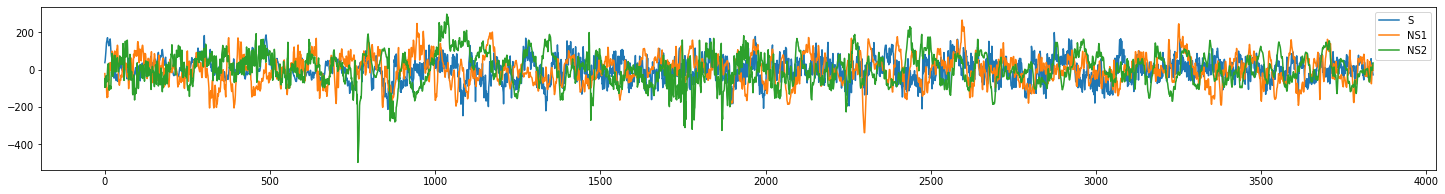

In [46]:
df3.plot(figsize = (25, 3))

# Plotting Error Graph of Mean, and Standard Deviation 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


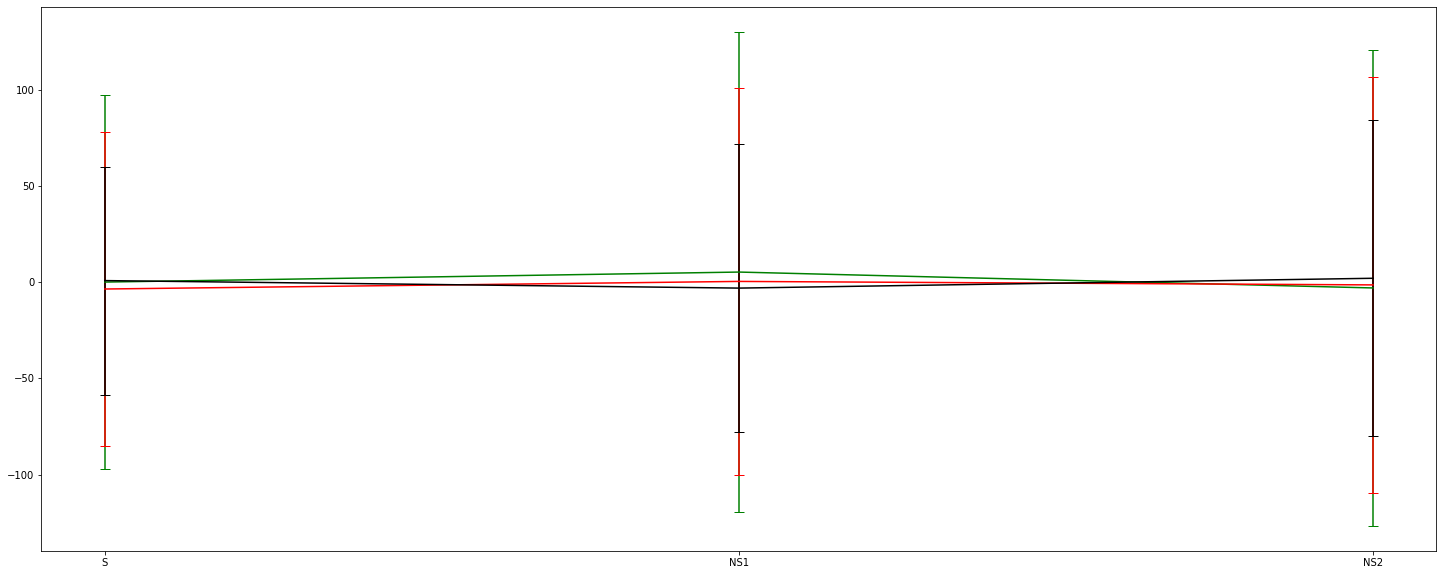

In [47]:
x = ["S","NS1","NS2"]
mean_sz1 = [C17_SZ1_Mean, C17_NS1_Mean, C17_NS2_Mean]
std_sz1 = [C17_SZ1_Std, C17_NS1_Std, C17_NS2_Std]

mean_sz2 = [C18_SZ2_Mean, C18_NS1_Mean, C18_NS2_Mean]
std_sz2 = [C18_SZ2_Std, C18_NS1_Std, C18_NS2_Std]

mean_sz3 = [C19_SZ3_Mean, C19_NS1_Mean, C19_NS2_Mean]
std_sz3 = [C19_SZ3_Std, C19_NS1_Std, C19_NS2_Std]

plt.figure(figsize=(25, 10))

#plt.errorbar(x, mean_sz1, yerr = std_sz1, color = "green", ecolor = "red", capsize = 5)
#plt.errorbar(x, mean_sz2, yerr = std_sz2, color = "blue", ecolor = "purple", capsize = 5)
#plt.errorbar(x, mean_sz3, yerr = std_sz3, color = "orange", ecolor = "pink", capsize = 5)

plt.errorbar(x, mean_sz1, yerr = std_sz1, color = "green", ecolor = "green", capsize = 5)
plt.errorbar(x, mean_sz2, yerr = std_sz2, color = "red", ecolor = "red", capsize = 5)
plt.errorbar(x, mean_sz3, yerr = std_sz3, color = "black", ecolor = "black", capsize = 5)

plt.show()

In [62]:
print(mean_sz1, std_sz1)
print(mean_sz2, std_sz2)
print(mean_sz3, std_sz3)


print(type(mean_sz1[0]))
print(mean_sz1[0].values[0])
print([v.values[0] for v in mean_sz1], [v.values[0] for v in std_sz1])
print([v.values[0] for v in mean_sz2], [v.values[0] for v in std_sz2])
print([v.values[0] for v in mean_sz3], [v.values[0] for v in std_sz1])

[FZ-CZ    0.01995
dtype: float64, FZ-CZ    5.222288
dtype: float64, FZ-CZ   -3.031572
dtype: float64] [FZ-CZ    97.022196
dtype: float64, FZ-CZ    124.781741
dtype: float64, FZ-CZ    123.736401
dtype: float64]
[CZ-PZ   -3.582621
dtype: float64, CZ-PZ    0.36162
dtype: float64, CZ-PZ   -1.445971
dtype: float64] [CZ-PZ    81.749642
dtype: float64, CZ-PZ    100.71571
dtype: float64, CZ-PZ    107.974681
dtype: float64]
[P7-T7    0.788258
dtype: float64, P7-T7   -3.108873
dtype: float64, P7-T7    1.997151
dtype: float64] [P7-T7    59.199926
dtype: float64, P7-T7    74.711226
dtype: float64, P7-T7    82.080286
dtype: float64]
<class 'pandas.core.series.Series'>
0.019950287807429894
[0.019950287807429894, 5.222287633001918, -3.031571603000176] [97.02219607637937, 124.78174131272196, 123.73640055771348]
[-3.5826210826210825, 0.36161986161986115, -1.4459706959706957] [81.74964186037944, 100.71571007157583, 107.97468081689065]
[0.7882580382580376, -3.1088726088726095, 1.9971509971509964] [97.022